### Libraries

In [ ]:
!pip install bertopic

In [ ]:
!pip install umap

In [1]:
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

import warnings
warnings.filterwarnings("ignore")

def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

from bertopic import BERTopic
from umap import UMAP
from wordcloud import WordCloud

### Data

In [2]:
with open("cnn_data_df_preprocessed.pkl", "rb") as fp:
    cnn_data_df = pickle.load(fp)

In [ ]:
cnn_data_df

In [3]:
def listToString(s):  
    str1 = ""   
    for ele in s:  
        str1 += ele+" "    
    return str1  

cnn_data_df[4] = cnn_data_df[3]
for i in range(0,len(cnn_data_df[4])):
    cnn_data_df[4][i] = listToString(cnn_data_df[4][i])

In [86]:
cnn_data_df

,0,1,2,3,4
0,"Jan 20, 2023",Brazilian footballer Dani Alves has been detai...,cnn,"[brazilian, footballer, dani, alves, detained,...",brazilian footballer dani alves detained polic...
1,"Jan 20, 2023",Lionel Messi and Cristiano Ronaldo put on a sh...,cnn,"[lionel, messi, cristiano, ronaldo, put, show,...",lionel messi cristiano ronaldo put show came h...
2,"Jan 18, 2023",As she finished a Zoom meeting with a colleagu...,cnn,"[finished, zoom, meeting, colleague, dr, célin...",finished zoom meeting colleague dr céline goun...
3,"Jan 16, 2023",The red-headed man wearing what looks like the...,cnn,"[red-headed, man, wearing, looks, like, ultima...",red-headed man wearing looks like ultimate chr...
4,"Jan 12, 2023",The US State Department rolled out a tool for ...,cnn,"[us, state, department, rolled, tool, afghans,...",us state department rolled tool afghans us par...
...,...,...,...,...,...
365,"Apr 07, 2022",With months to go until the 2022 World Cup in ...,cnn,"[months, go, qatar, less, week, since, draw, t...",months go qatar less week since draw took plac...
366,"Apr 07, 2022",Anatoliy Trubin should be enjoying life as a p...,cnn,"[anatoliy, trubin, enjoying, life, professiona...",anatoliy trubin enjoying life professional foo...
367,"Apr 04, 2022",Netherlands coach Louis van Gaal said on Sunda...,cnn,"[netherlands, coach, louis, van, gaal, said, s...",netherlands coach louis van gaal said sunday b...
368,"Apr 02, 2022",After more than 40 years of sour relations and...,cnn,"[years, sour, relations, months, struggle, res...",years sour relations months struggle restore n...


### BERTopic

In [4]:
start = time.time()
# example based on: https://medium.com/grabngoinfo/topic-modeling-with-deep-learning-using-python-bertopic-cf91f5676504

# UMAP algorithm for reducing dimensions of documents' embeddings
# more: https://umap-learn.readthedocs.io/en/latest/parameters.html
umap_model = UMAP(n_neighbors = 15, # number of neighbours to be taken info account when considering word's context
                  n_components = 10, # destinated dimensionality 
                  min_dist = 0.1, # minimum distance apart that words are allowed to be groupped together
                  metric = 'cosine', # the above distance's type
                  random_state = 123)

# more about BERTopic: https://maartengr.github.io/BERTopic/index.html
model = BERTopic(umap_model = umap_model, 
                 language = "english", # BERTopic can operate on different languages, also it can be set to "multilingual"
                 calculate_probabilities = True,
                 top_n_words = 10,
                 n_gram_range=(1,3))

topics, probabilities = model.fit_transform(cnn_data_df[4])
model.save("bert")
print(time.time()-start)

52.12212777137756


### BERTopic - topics obtained

In [89]:
model.get_topic_info()

,Topic,Count,Name
0,-1,50,-1_said_qatar_football_match
1,0,124,0_match_argentina_team_messi
2,1,101,1_qatar_said_rights_tournament
3,2,25,2_said_russian_ukraine_ukrainian
4,3,24,3_iran_iranian_irans_team
5,4,19,4_ronaldo_portugal_match_switzerland
6,5,16,5_iran_us_wales_england
7,6,11,6_womens_soccer_mens_fifa


52 Topics were detected.

Topic -1 stands for all the topics together. Count is 1290, i.e. 1290 news were assigned to the topics. There were 3086 documents... It means that 3086 - 1290 = 1796 news were not assigned to any topic!

### BERTopic - top keywords with weights

In [90]:
for k in range(len(model.get_topic_info())):
    print(model.get_topic(k))

[('match', 0.01305887531103056), ('argentina', 0.0114314886534213), ('team', 0.011105799793872669), ('messi', 0.01003282734121438), ('first', 0.009706246118997935), ('goal', 0.009114764907629306), ('game', 0.008585937464011378), ('france', 0.008293068227797476), ('qatar', 0.007856049528064487), ('group', 0.00754894364345701)]
[('qatar', 0.016980877084737844), ('said', 0.01385506227830149), ('rights', 0.00953366555550787), ('tournament', 0.008816579063602625), ('fifa', 0.008451897299599165), ('cnn', 0.008209979732601192), ('workers', 0.007960395215424118), ('people', 0.007938399899815644), ('human', 0.007476323565026686), ('human rights', 0.007232931461132847)]
[('said', 0.027145792575250578), ('russian', 0.02541185735433956), ('ukraine', 0.023402303059440376), ('ukrainian', 0.01793448185734441), ('russia', 0.013625228156598324), ('us', 0.010315793920090818), ('city', 0.010045939288721521), ('forces', 0.009319414761227406), ('military', 0.009270699818358718), ('war', 0.00925852069927195

In [91]:
model.visualize_topics()

In [93]:
model.visualize_distribution(probabilities[200], min_probability=0.015)

In [94]:
model.visualize_hierarchy(top_n_topics=10)

In [95]:
model.visualize_barchart(top_n_topics=10,n_words=10, height=300)

In [29]:
len(cnn_data_df)
model.probabilities_

370

## Word Cloud

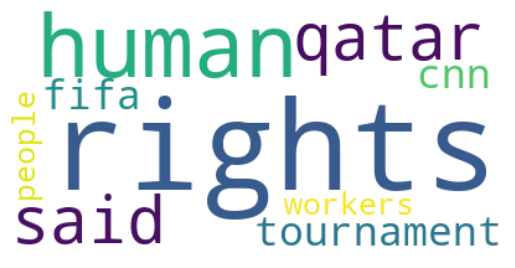

In [24]:
text = " ".join([model.get_topic(1)[k][0] for k in range(10)])
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('bert_topic1_cnn_wordcloud.png')
plt.show()

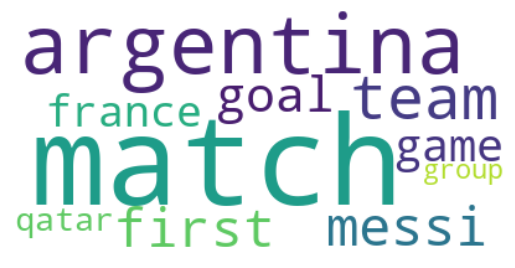

In [9]:
text = " ".join([model.get_topic(0)[k][0] for k in range(10)])
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('bert_topic0_cnn_wordcloud.png')
plt.show()

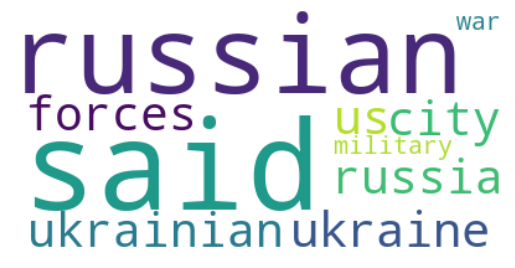

In [11]:
text = " ".join([model.get_topic(2)[k][0] for k in range(10)])
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('bert_topic2_cnn_wordcloud.png')
plt.show()

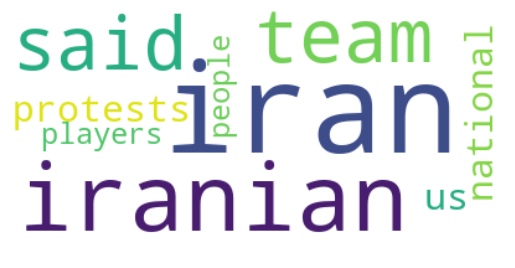

In [12]:
text = " ".join([model.get_topic(3)[k][0] for k in range(10)])
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('bert_topic3_cnn_wordcloud.png')
plt.show()

In [9]:
model.get_topic(1)
def topic_by_index(model, feature_names, no_top_words, topic_index):
    for topic_idx, topic in enumerate(model.components_):
        if(topic_idx == topic_index):
            text = " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
            wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(text)
            plt.figure()
            plt.imshow(wordcloud, interpolation="bilinear")
            plt.axis("off")
            plt.show()

[('qatar', 0.016980877084737844),
 ('said', 0.01385506227830149),
 ('rights', 0.00953366555550787),
 ('tournament', 0.008816579063602625),
 ('fifa', 0.008451897299599165),
 ('cnn', 0.008209979732601192),
 ('workers', 0.007960395215424118),
 ('people', 0.007938399899815644),
 ('human', 0.007476323565026686),
 ('human rights', 0.007232931461132847)]

### BERTopic - representative documents

In [ ]:
model.get_representative_docs()[0]

### Finding topics with certain keyword

In [12]:
model.find_topics("messi")

([0, 1, -1, 3, 4],
 [0.3719430926574459,
  0.3702223028113406,
  0.36546636030486646,
  0.34858405523152447,
  0.339331588127869])

In [16]:
model.get_topic(4)

[('iran', 0.04864030747456193),
 ('us', 0.04471642412356532),
 ('wales', 0.04093634691570424),
 ('its', 0.03951401737655103),
 ('england', 0.037053838904538026),
 ('world', 0.03538241980520269),
 ('team', 0.0353756737896852),
 ('match', 0.03518178045525215),
 ('cup', 0.032657308008140935),
 ('was', 0.02967111345057834)]

### Reducing number of topics

In [ ]:
model.reduce_topics(cnn_data_df[4], nr_topics=20)

In [ ]:
model.get_topic_info()

In [ ]:
model.get_topic(0)

In [ ]:
model.topics_